# Hodan Mohamed Abdi_DVizHDip_CA1

--------------------------------------------------------------------------------------------------------

### INTRODUCTION

--------------------------------------------------------------------------------------------------------

As part of this assignment, I have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season. Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python. The companies CTO also requires you to rationalize all the decisions that you have made in your Jupyter Notebook report. This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant


--------------------------------------------------------------------------------------------------------

**Task: Data Preparation - Statistical Techniques - Data wrangling - Data Engineering - Feature Selection - Data Visualisation**

--------------------------------------------------------------------------------------------------------

**Individule Task:** 

You are required to use the dataset contained within the file “vgsales.csv” and then answer the following questions: 

   **Part 1: (Column Names are denoted by quotation marks)**  
   
        • What are the top 5 games by global sales?  
        • Is there a correlation between the “na_sales” and “jp_sales” for 
    
   **The years 2010-2014?**  
   
        • What is the distribution of the most popular 4 game genres?  
        • Do older games (2005 and earlier) have a higher MEAN “eu_sales” 
    
   **Than newer games (after 2005)?**  
   
        • What are the 3 most common “developer” in the dataset?  


--------------------------------------------------------------------------------------------------------

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Firstly we start with loading the libraries. 

--------------------------------------------------------------------------------------------------------

#### Importing Dataset

In [4]:
videosales_df =pd.read_csv ("vgsales (1).csv")

In [5]:
videosales_df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------------------------------------------------------------

### Characterisation of Dataset

In [11]:
videosales_df.shape

(16719, 16)

#### Identifying Attributes

In [12]:
num_attributes = len(videosales_df.columns)
print("Number of Attributes:", num_attributes)

Number of Attributes: 16


#### Identifying Observations

In [25]:
num_observations = videosales_df.shape[0]
print("Number of Observations:", num_observations)

Number of Observations: 16719


In [10]:
videosales_df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------------------------------------------------------------

## EXPLORATORY DATA ANALYSIS

In [26]:
videosales_df.head(16719)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
videosales_df.value_counts()

Name                          Platform  Year_of_Release  Genre         Publisher              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  Developer           Rating
 Tales of Xillia 2            PS3       2012.0           Role-Playing  Namco Bandai Games     0.20      0.12      0.45      0.07         0.84          71.0          59.0          7.9         216.0       Bandai Namco Games  T         1
Reign of Fire                 GC        2002.0           Shooter       BAM! Entertainment     0.08      0.02      0.00      0.00         0.11          54.0          9.0           5.9         7.0         Kuju Entertainment  T         1
RedCard 20-03                 PS2       2002.0           Sports        Midway Games           0.03      0.03      0.00      0.01         0.07          73.0          19.0          9           6.0         Midway              E         1
                              GC        2002.0           Sports  

**DataType**

In [23]:
videosales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [24]:
print("The data set has {} rows and {} columns".format(videosales_df.shape[0], videosales_df.shape[1]))
display(videosales_df.describe())
display(videosales_df.head())
display(videosales_df.dtypes.value_counts())

The data set has 16719 rows and 16 columns


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


float64    9
object     7
Name: count, dtype: int64

The videosales_df comprises 16719 observations and 16 features. Upon using the .info() function, it becomes apparent that the dataset contains both float and object data types, with the absence of integer types.

Notably, some variables, such as Rating, require transformation, and additional variables need conversion to integers after addressing missing values.

--------------------------------------------------------------------------------------------------------

**Identifying Duplicated** 

In [27]:
videosales_df.duplicated().sum()

0

## Exploring The Missing Values

In [28]:
videosales_df.isnull().sum().sum()

46716

   ### Identifying missing values

In [7]:
missing_values = videosales_df.isnull().sum()
print(missing_values)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [30]:
import pandas as pd

missing_values = videosales_df.isnull().sum()

missing_percentage = (videosales_df.isnull().sum() / len(videosales_df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_info)

                 Missing Values  Percentage
Name                          2    0.011962
Platform                      0    0.000000
Year_of_Release             269    1.608948
Genre                         2    0.011962
Publisher                    54    0.322986
NA_Sales                      0    0.000000
EU_Sales                      0    0.000000
JP_Sales                      0    0.000000
Other_Sales                   0    0.000000
Global_Sales                  0    0.000000
Critic_Score               8582   51.330821
Critic_Count               8582   51.330821
User_Score                 6704   40.098092
User_Count                 9129   54.602548
Developer                  6623   39.613613
Rating                     6769   40.486871


**Identifying Total Zero Counts**

In [31]:
total_data = videosales_df.size
zero_count = (videosales_df ==0).sum().sum()
percentage_zeros = (zero_count / total_data) * 100

print("Number of zeros in the DataFrame: ", zero_count)
print(f"Percentage of Zeros: {percentage_zeros:.2f}%")

Number of zeros in the DataFrame:  27504
Percentage of Zeros: 10.28%


**Idenfying Dubplicate**

In [32]:
duplicate_rows = videosales_df[videosales_df.duplicated()]
duplicate_rows

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


### NaN Count

In [33]:
import pandas as pd

NaN_counts = videosales_df.isnull().sum(axis=1)
threshold = 0.9* videosales_df.shape[1]
rows_with_90_percent_NaN = NaN_counts[NaN_counts > threshold]

print(f"Number of rows with more than 90% NaN values: {len(rows_with_90_percent_NaN)}")

list_of_rows = rows_with_90_percent_NaN.index.tolist()
print("List of rows with more than 90% NaN values:")
print(list_of_rows)

Number of rows with more than 90% NaN values: 0
List of rows with more than 90% NaN values:
[]


## Visualization of missing values

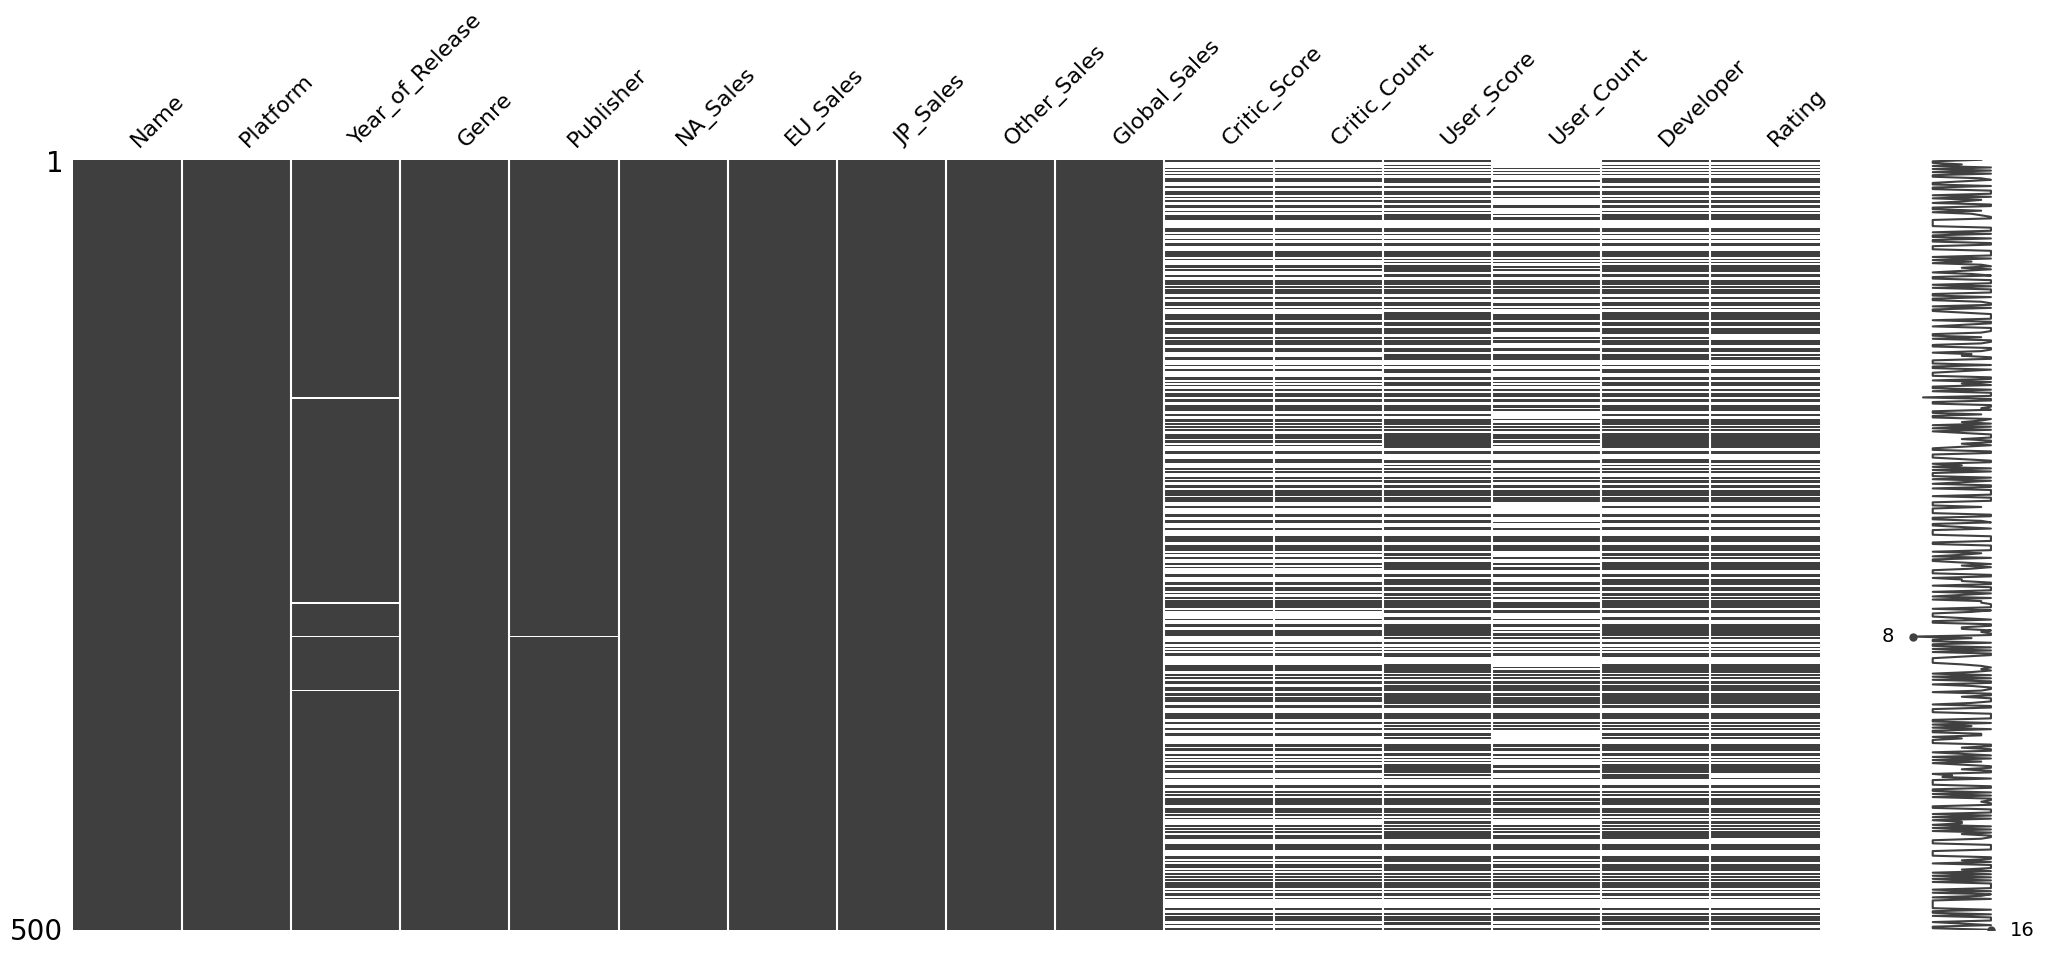

In [34]:
import missingno as msno

ax = msno.matrix(videosales_df.sample(500))

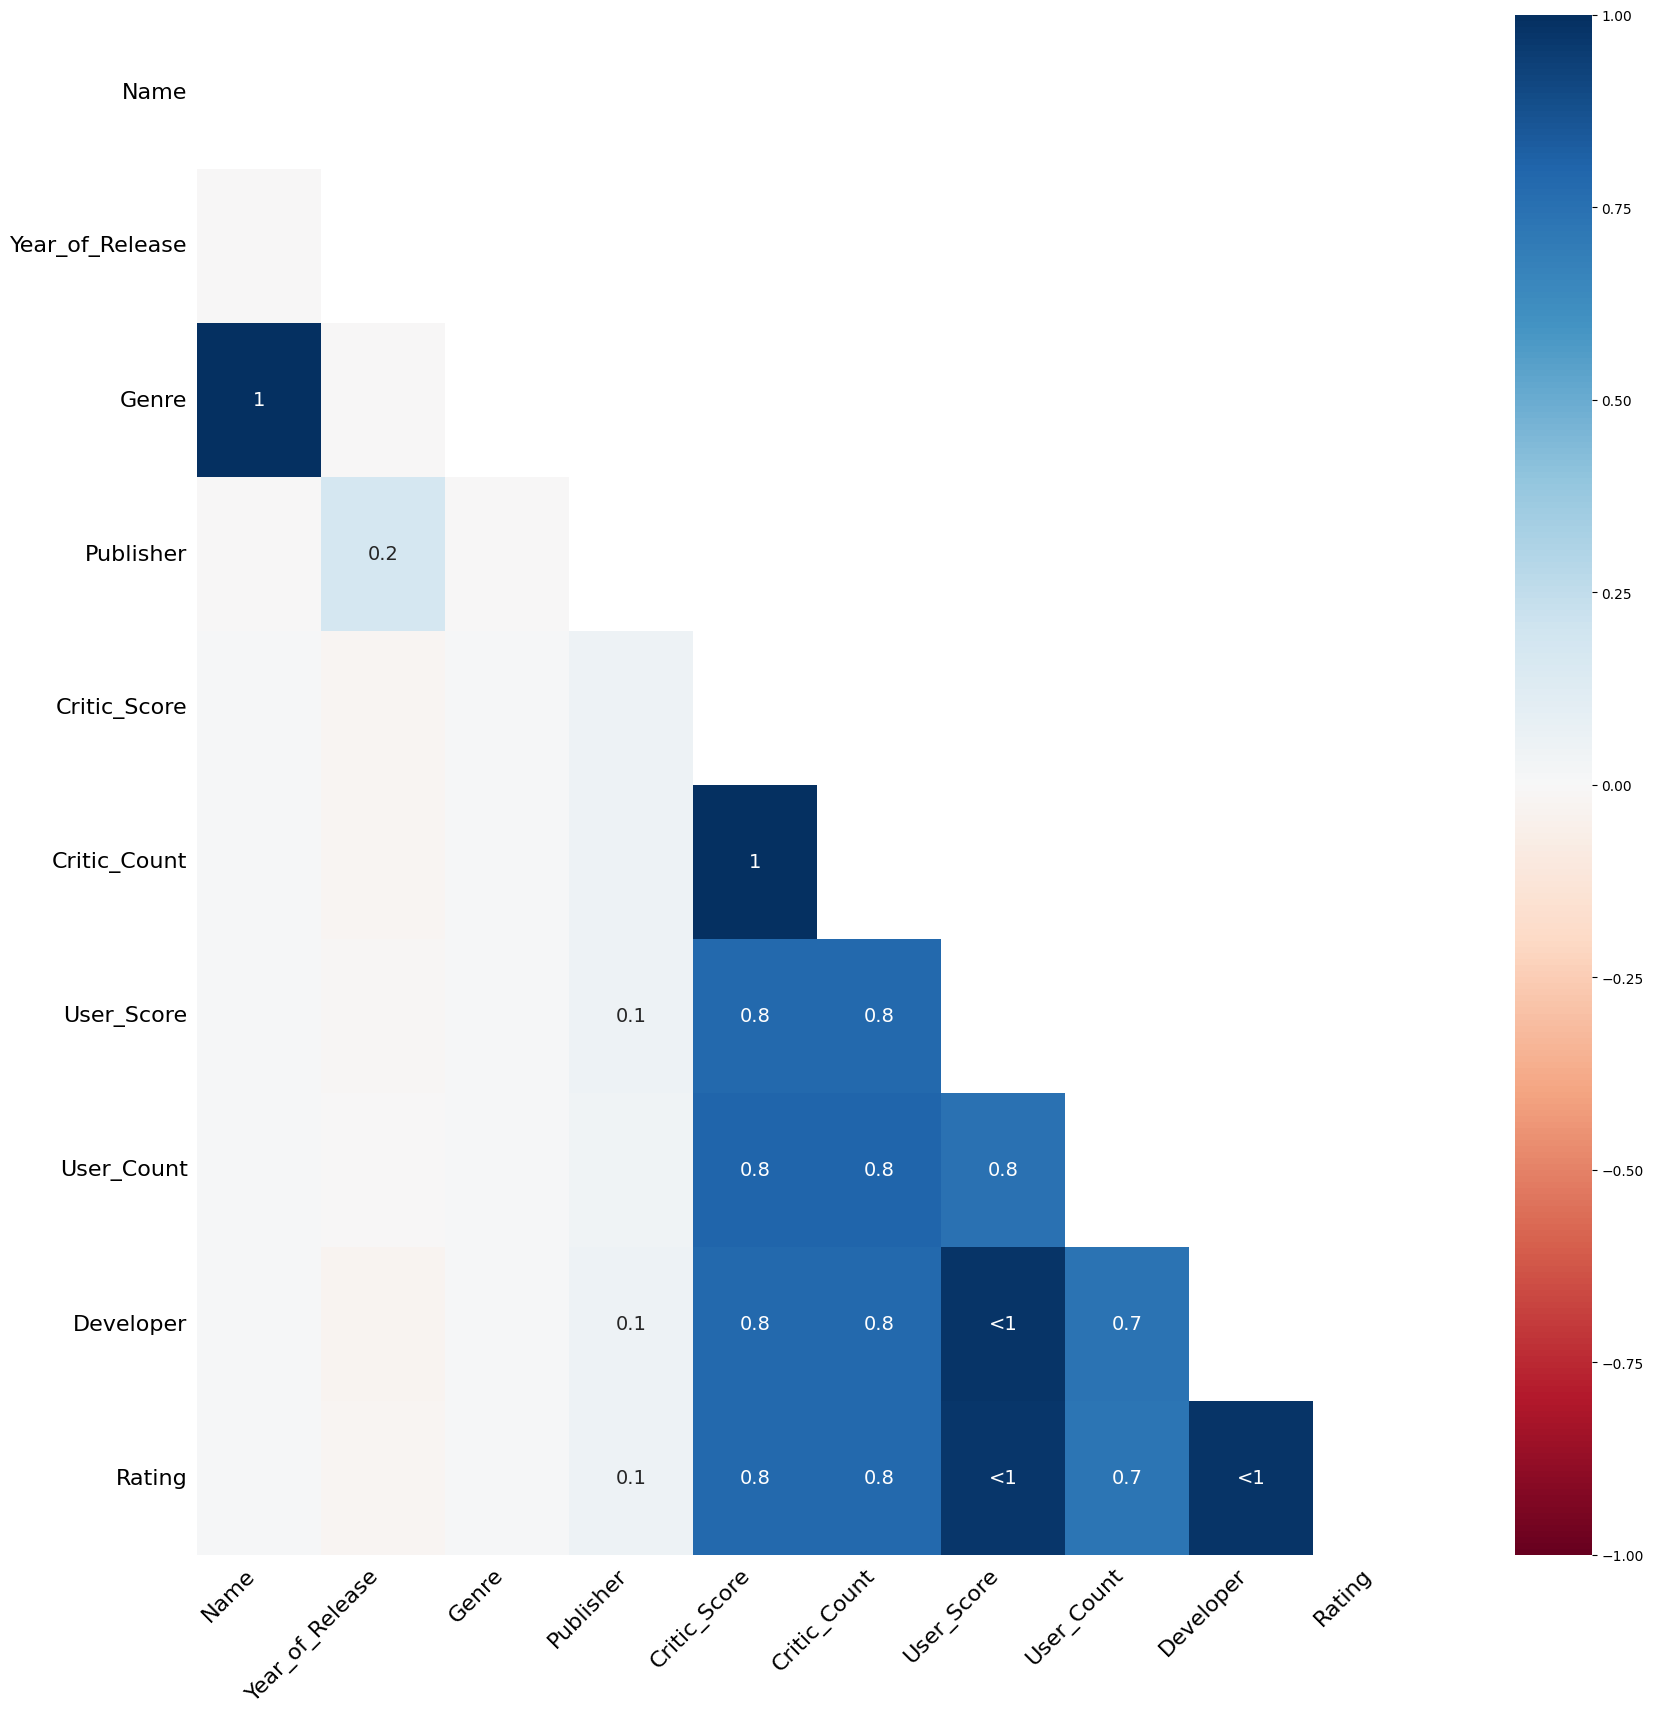

In [36]:
ax = msno.heatmap(videosales_df, figsize=(20, 20))

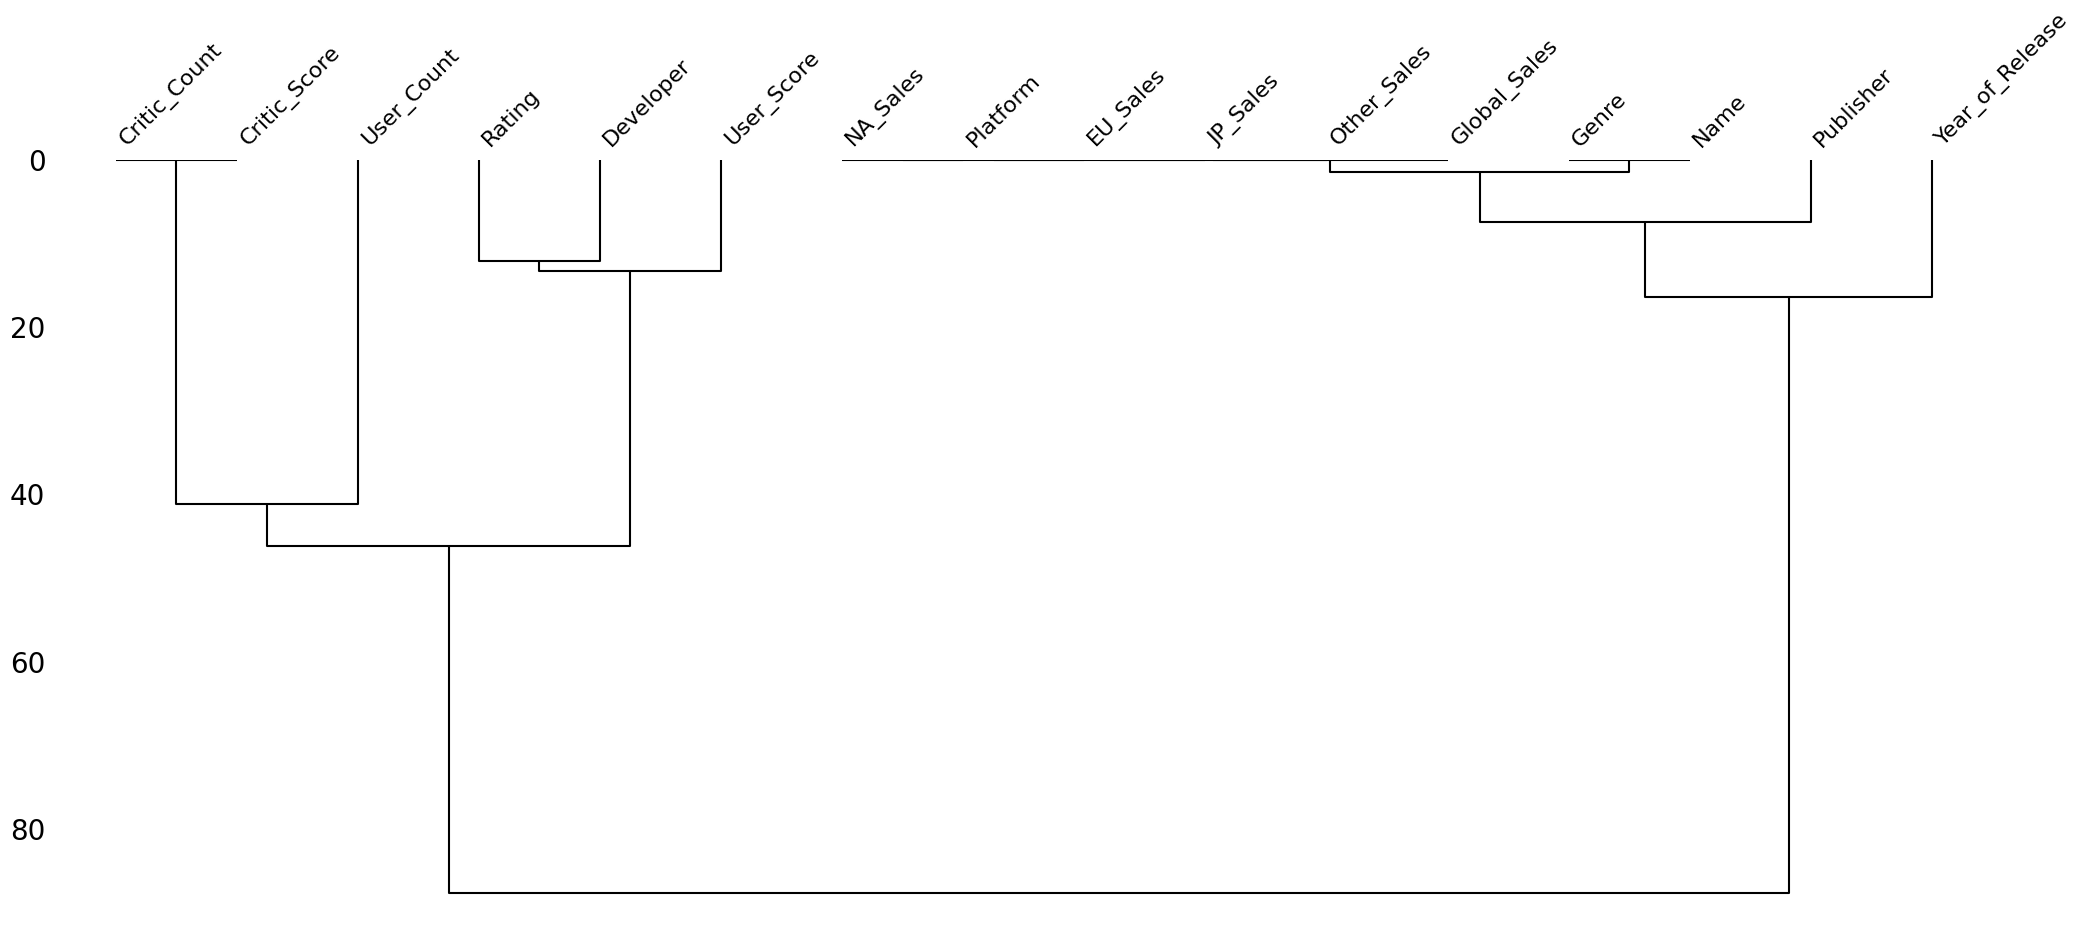

In [37]:
ax = msno.dendrogram(videosales_df)

In [38]:
pd.set_option('display.max_columns', None)
print(videosales_df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [41]:
colonn = videosales_df['Rating']
pd.set_option('display.max_rows', None) 
display(colonn)

0           E
1         NaN
2           E
3           E
4         NaN
5         NaN
6           E
7           E
8           E
9         NaN
10        NaN
11          E
12        NaN
13          E
14          E
15          E
16          M
17          M
18        NaN
19          E
20        NaN
21        NaN
22        NaN
23          M
24          M
25        NaN
26          E
27        NaN
28          E
29          M
30        NaN
31        NaN
32          M
33        NaN
34          M
35          M
36          M
37          M
38          M
39          T
40          E
41          M
42          M
43          E
44          M
45        NaN
46        NaN
47        NaN
48          E
49          E
50        NaN
51          M
52          E
53          E
54          E
55          M
56        NaN
57          M
58        NaN
59        NaN
60          M
61       E10+
62          E
63        NaN
64          M
65          T
66          M
67          T
68       E10+
69          M
70          M
71    

**Exploring Numerical Columns**

Descriptive Statistics to explore numerical as well as categorical columns.

Function videosales_df.describe() will provide us with all the basic statistics data of attributes.

In [43]:
#exploring basic statistical information about columns
videosales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.0000,16719.0000,16719.0000,16719.0000,16719.0000,16719.0000,8137.0000,8137.0000,7590.0000
mean,2006.4874,0.2633,0.1450,0.0776,0.0473,0.5335,68.9677,26.3608,162.2299
std,5.8790,0.8135,0.5033,0.3088,0.1867,1.5479,13.9382,18.9805,561.2823
min,1980.0000,0.0000,0.0000,0.0000,0.0000,0.0100,13.0000,3.0000,4.0000
25%,2003.0000,0.0000,0.0000,0.0000,0.0000,0.0600,60.0000,12.0000,10.0000
50%,2007.0000,0.0800,0.0200,0.0000,0.0100,0.1700,71.0000,21.0000,24.0000
75%,2010.0000,0.2400,0.1100,0.0400,0.0300,0.4700,79.0000,36.0000,81.0000
max,2020.0000,41.3600,28.9600,10.2200,10.5700,82.5300,98.0000,113.0000,10665.0000


**Exploring Categorical Columns**

Similarly, we can use videosales_df.describe( 'include = 'object' ) for categorical columns.

In [44]:
videosales_df.describe(include='object')

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


**Exploring unique values** of **categorical columns**
Let's explore unique values present in the dataset as follows:

In [45]:
for column in videosales_df.columns:
  if videosales_df[column].dtype == object:
    print(str(column) + ":" + str(videosales_df[column].unique()))
    print(videosales_df[column].value_counts())
    print("---------------------------------------------------------------------")

Name:['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Name
Need for Speed: Most Wanted                                                                                                             12
FIFA 14                                                                                                                                  9
Ratatouille                                                                                                                              9
LEGO Marvel Super Heroes                                                                                                                 9
Madden NFL 07                                                                                                                            9
FIFA 15                                                                                                                                  8
LEGO Harry Potte

### Cleaning Dataset by dropping unwanted columns
Data cleaning will allow to drop unrequired features from the Dataset and avoid any bias in our Visiualisation

**Data Visualisation**


Visulals are easy to interpret and analyse. Data Visualization will help us to gain more key insights from our dataset. Let's explore our dataset using Python's important and powerful libraries for visualization i.e. Matplotlib and seaborn.

**Exploration of Numerical Columns using Histograms**

Exploring all numerical columns using videosales_df.hist(). It help us understand the data better, with this visualization we are able to see how the data is distributed and if there are any outliers in the data sets.

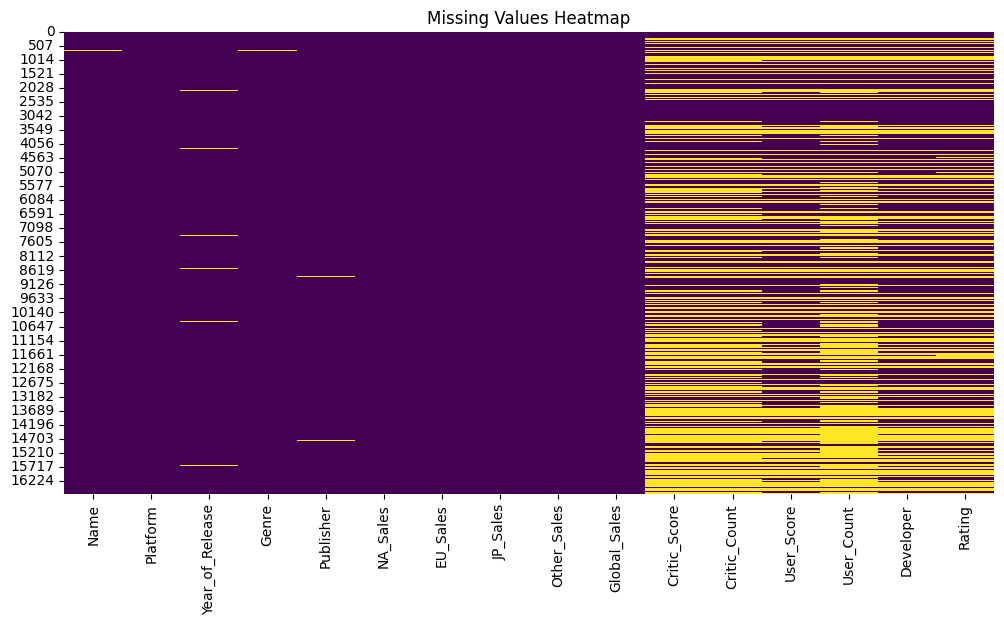

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(videosales_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
